# **Часть 1. Предобработка**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [7]:
df['DEBTINC'] = df['DEBTINC'].fillna(value=np.nanmean(df['DEBTINC']))
df['YOJ'] = df['YOJ'].fillna(value=np.nanmedian(df['YOJ']))
df = df.dropna(subset=['LOAN'])
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5960.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.756166,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.259424,0.846047,1.127266,85.810092,1.728675,10.138933,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,33.779915
75%,0.000000,23300.000000,91488.000000,119824.250000,12.000000,0.000000,0.000000,231.562278,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


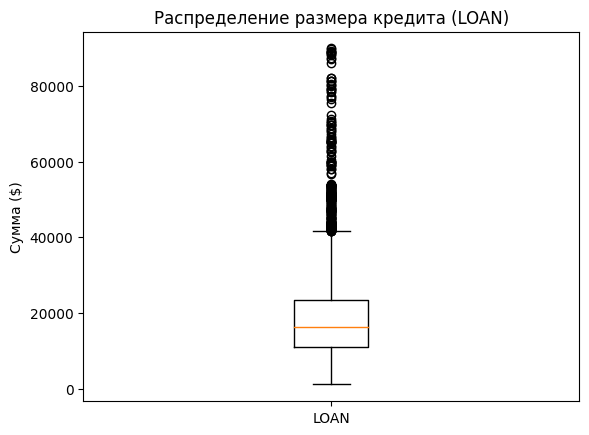

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(df['LOAN'])

plt.title("Распределение размера кредита (LOAN)")
plt.ylabel("Сумма ($)")
plt.xticks([1], ['LOAN']) 

plt.show()

In [9]:
df = df.drop(df[df['DEBTINC'] > 100].index)

df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5955.000000,5955.000000,5437.000000,5843.000000,5955.000000,5247.000000,5376.000000,5647.000000,5445.000000,5733.000000,5955.000000
mean,0.198825,18595.113350,73727.441457,101741.716249,8.761503,0.254622,0.448289,179.782203,1.186042,21.293040,33.684176
std,0.399149,11192.738929,44436.581802,57352.702540,7.260073,0.846358,1.124908,85.825276,1.729320,10.141821,6.828737
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46266.000000,66049.000000,3.000000,0.000000,0.000000,115.133546,0.000000,14.000000,30.742769
50%,0.000000,16300.000000,65012.000000,89231.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,33.779915
75%,0.000000,23300.000000,91402.000000,119780.000000,12.000000,0.000000,0.000000,231.492019,2.000000,26.000000,37.942284
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,91.612600


In [10]:
pd.unique(df['REASON'])

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [11]:
df['REASON'] = df['REASON'].fillna(value=df['REASON'].mode()[0]) 
pd.unique(df['REASON'])

array(['HomeImp', 'DebtCon'], dtype=object)

In [12]:
edu_dict = {'DebtCon':0, 'HomeImp':1}
df['REASON'] = [edu_dict[x] for x in df['REASON']]
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915
1,1,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915
2,1,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915
3,1,1500,NaN,NaN,0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,33.779915
4,0,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915


In [13]:
df = df.drop(columns=['DEROG', 'DELINQ'])
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1,Other,10.5,94.366667,1.0,9.0,33.779915
1,1,1300,70053.0,68400.0,1,Other,7.0,121.833333,0.0,14.0,33.779915
2,1,1500,13500.0,16700.0,1,Other,4.0,149.466667,1.0,10.0,33.779915
3,1,1500,NaN,NaN,0,NaN,7.0,NaN,NaN,NaN,33.779915
4,0,1700,97800.0,112000.0,1,Office,3.0,93.333333,0.0,14.0,33.779915


In [14]:
pd.unique(df['JOB'])

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [15]:
df = pd.get_dummies(df, prefix='job', dtype=float)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,CLAGE,NINQ,CLNO,DEBTINC,job_Mgr,job_Office,job_Other,job_ProfExe,job_Sales,job_Self
0,1,1100,25860.0,39025.0,1,10.5,94.366667,1.0,9.0,33.779915,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1300,70053.0,68400.0,1,7.0,121.833333,0.0,14.0,33.779915,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1500,13500.0,16700.0,1,4.0,149.466667,1.0,10.0,33.779915,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1500,NaN,NaN,0,7.0,NaN,NaN,NaN,33.779915,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1700,97800.0,112000.0,1,3.0,93.333333,0.0,14.0,33.779915,0.0,1.0,0.0,0.0,0.0,0.0


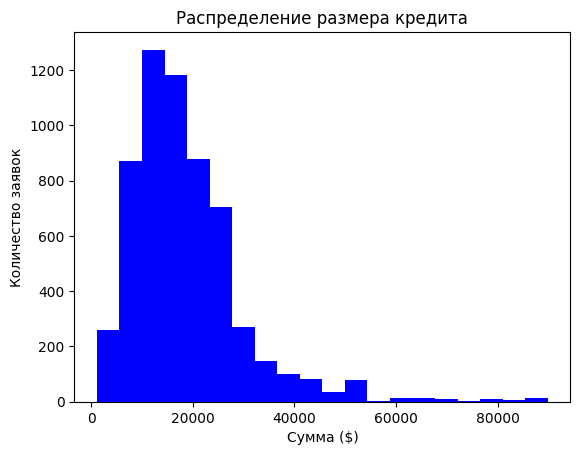

In [16]:
plt.hist(df['LOAN'], bins=20, color='#0000FF')
plt.title('Распределение размера кредита')
plt.xlabel('Сумма ($)')
plt.ylabel('Количество заявок')
plt.show()

In [17]:
cols_to_norm = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE']  

cols_to_std = ['DEBTINC', 'NINQ', 'DEROG', 'DELINQ']  

for col in cols_to_norm:
    if col in df.columns:
        df[col+'_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

for col in cols_to_std:
    if col in df.columns:
        df[col+'_std'] = (df[col] - df[col].mean()) / df[col].std()

df[['LOAN_norm', 'DEBTINC_std']].describe()

,LOAN_norm,DEBTINC_std
count,5955.000000,5.955000e+03
mean,0.197017,-2.863648e-17
std,0.126044,1.000000e+00
min,0.000000,-4.855902e+00
25%,0.112613,-4.307395e-01
50%,0.171171,1.402012e-02
75%,0.250000,6.235573e-01
max,1.000000,8.483036e+00


# **Часть 2. Визуализация**

<Axes: >

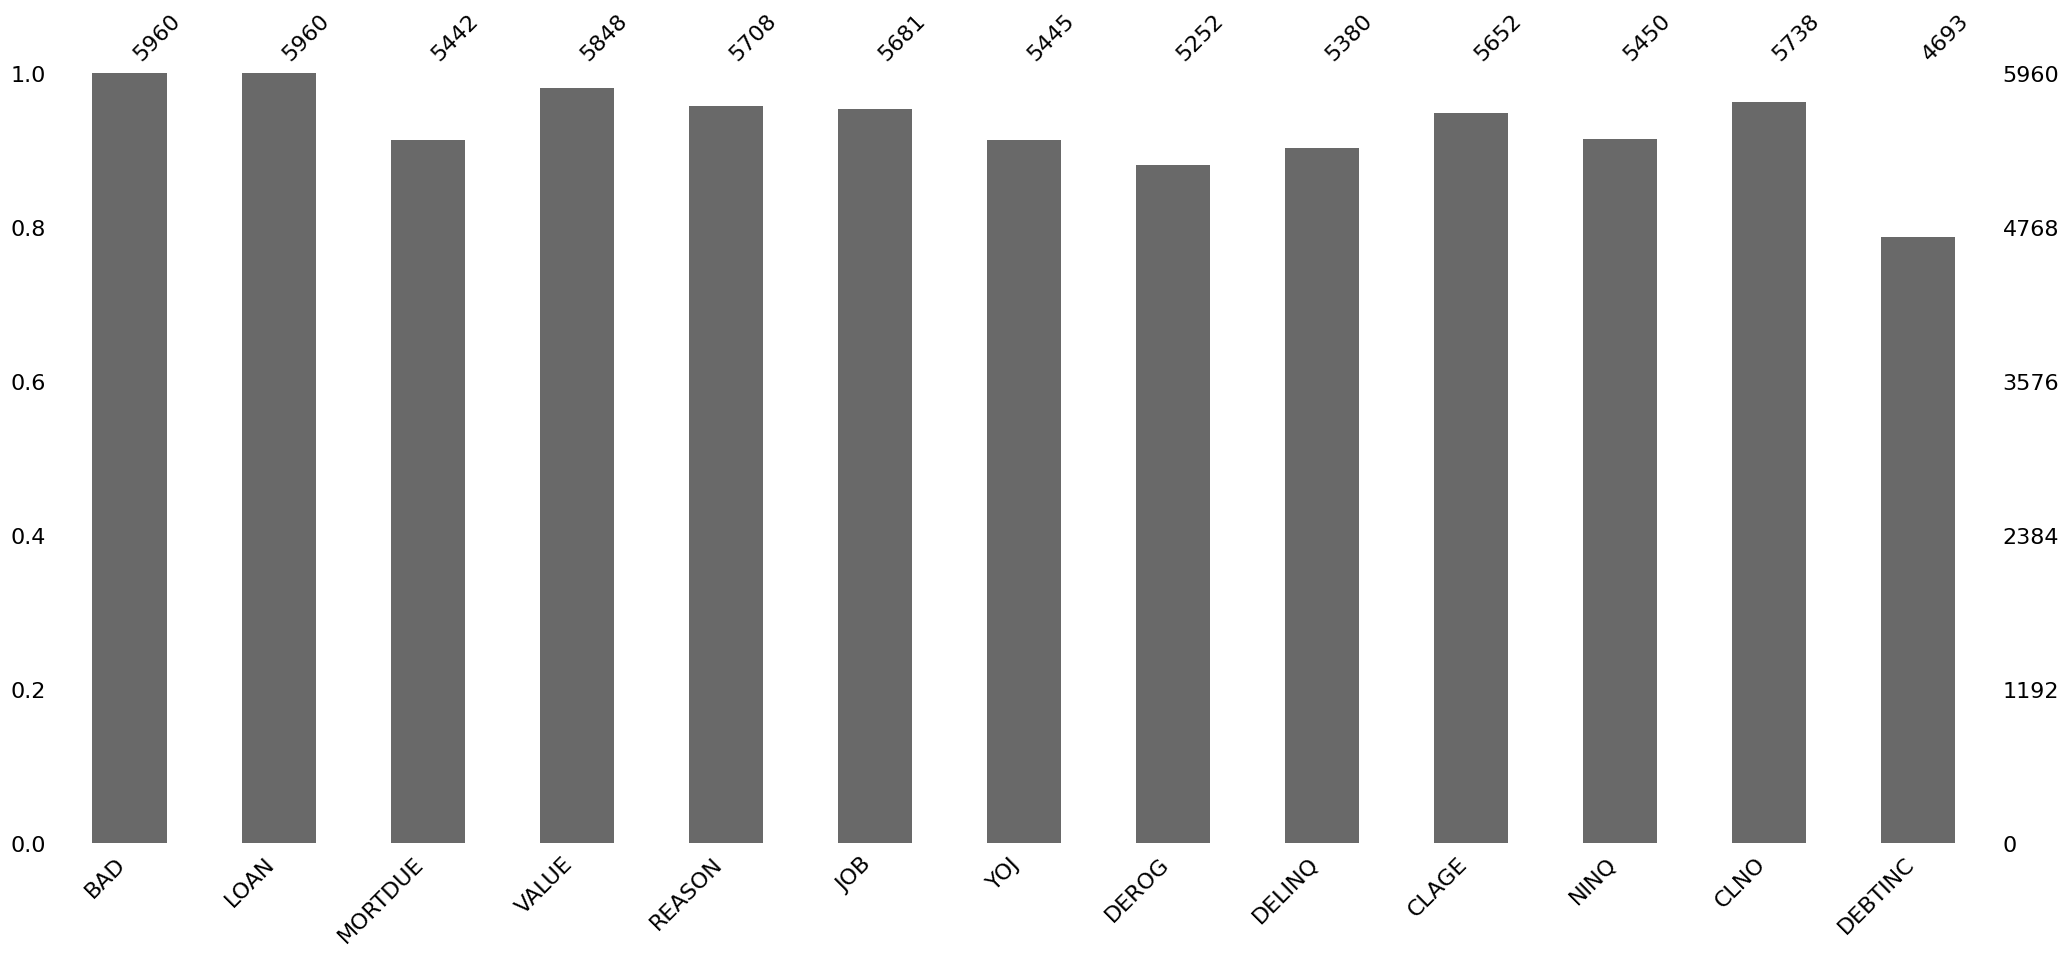

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
df2 = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')
msno.bar(df2)

<Axes: >

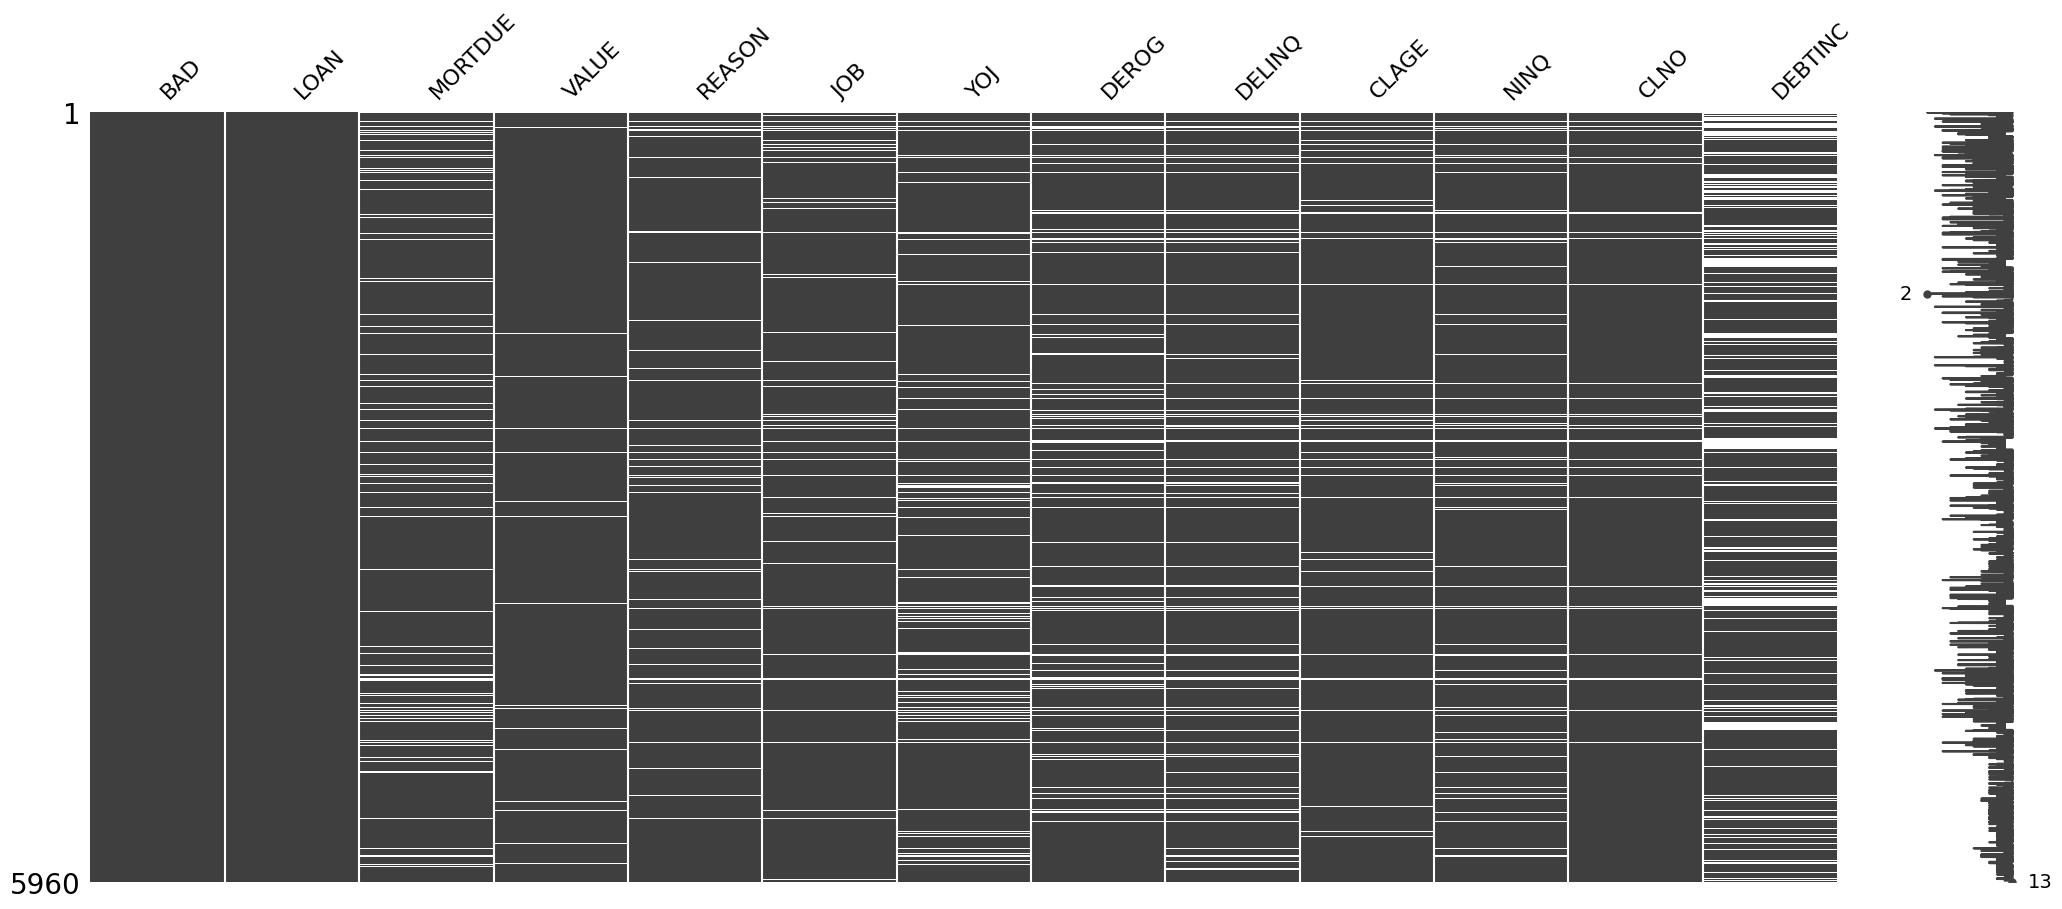

In [19]:
msno.matrix(df2)

<Axes: >

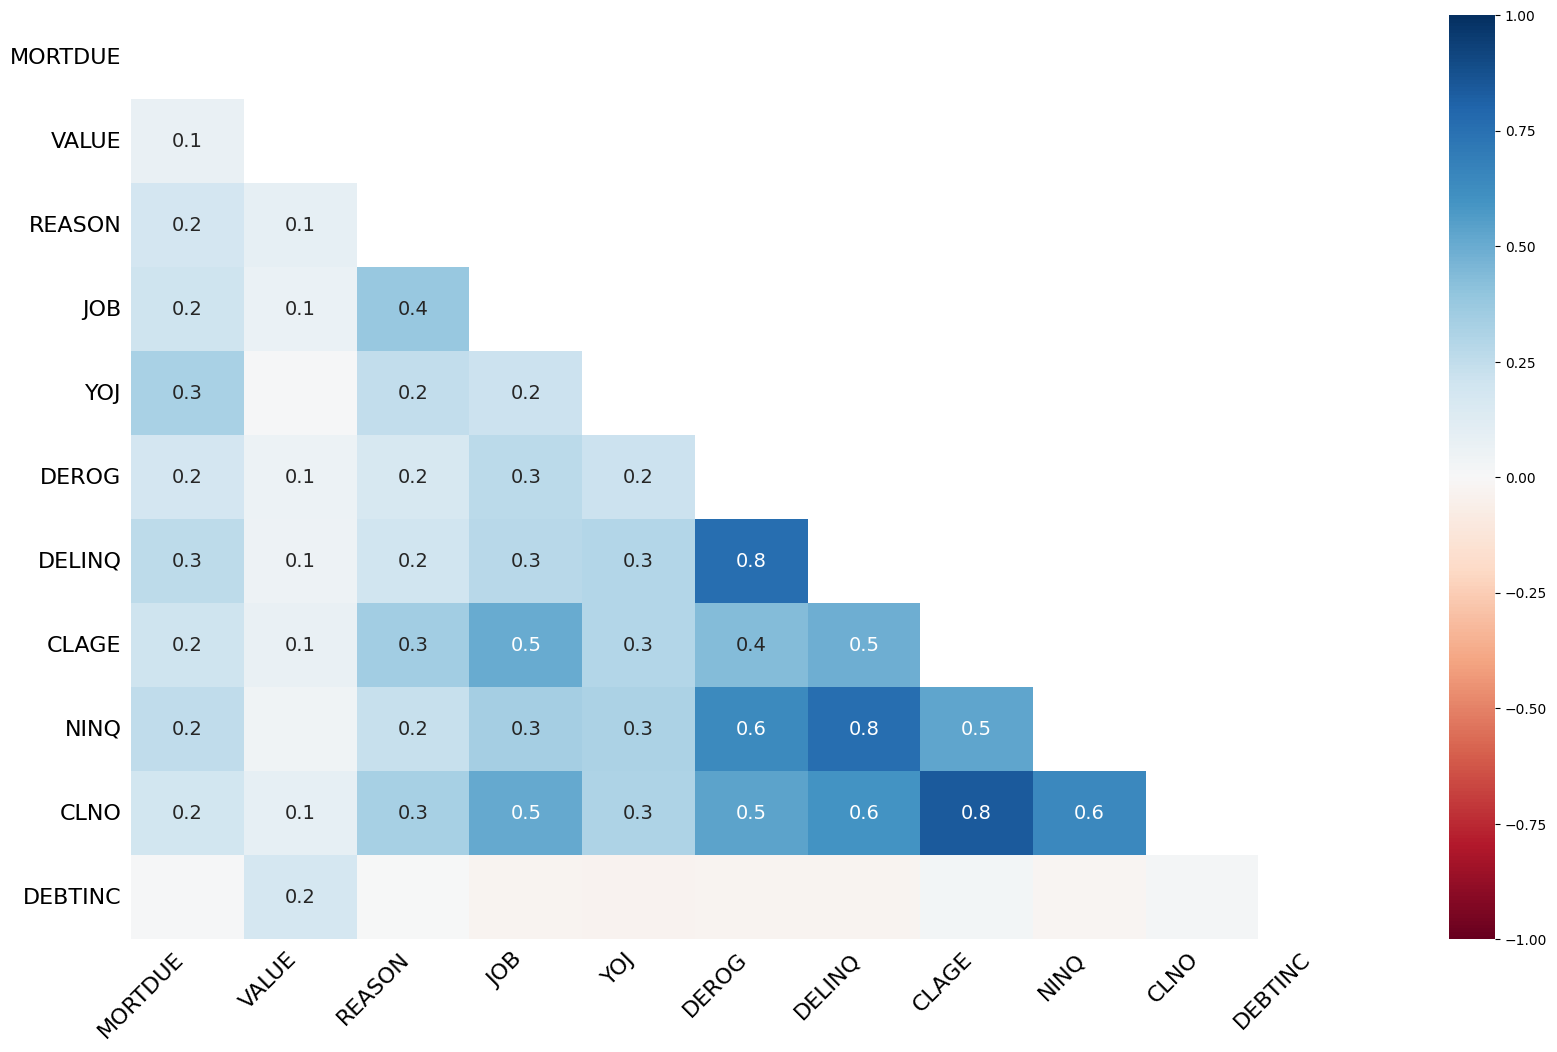

In [20]:
msno.heatmap(df2)

In [21]:
cols = [x for x in df.columns if x.startswith('job')]

meanPerson = {}

for col in cols:

    meanPerson[col] = np.sum(df['LOAN'] * df[col]) / np.sum(df[col])

meanPerson

{'job_Mgr': 19155.28031290743,
 'job_Office': 18142.616033755276,
 'job_Other': 18059.614578969416,
 'job_ProfExe': 18946.980392156864,
 'job_Sales': 14836.111111111111,
 'job_Self': 28308.376963350784}

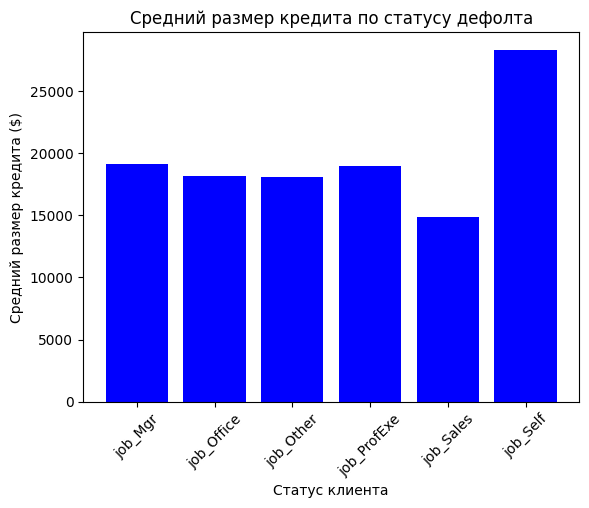

In [22]:
plt.bar(cols, list(meanPerson.values()), color='#0000FF')

plt.title('Средний размер кредита по статусу дефолта')
plt.xlabel('Статус клиента')
plt.ylabel('Средний размер кредита ($)')
plt.xticks(rotation=45)
plt.show()

In [23]:
meanLoan = [0] * 5
for i in range(5):
    ind = round(4 * df['YOJ']) == i 
    meanLoan[i] = np.sum(df['LOAN'] * ind) / np.sum(ind)

print("Средний размер кредита по группам стажа (YOJ):")
meanLoan

Средний размер кредита по группам стажа (YOJ):


[16826.573426573428,
 17283.333333333332,
 16085.0,
 19433.333333333332,
 17042.0054200542]

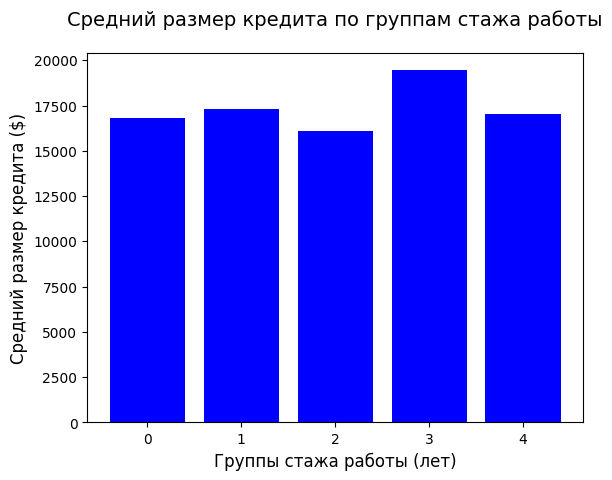

In [24]:
plt.bar(range(5), meanLoan, color='#0000FF')

plt.title('Средний размер кредита по группам стажа работы', pad=20, fontsize=14)
plt.xlabel('Группы стажа работы (лет)', fontsize=12)
plt.ylabel('Средний размер кредита ($)', fontsize=12)

plt.show()

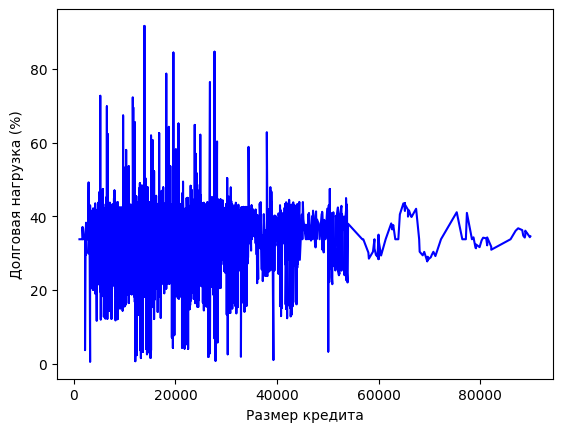

In [25]:
x = np.array(df['LOAN'])
y = np.array(df['DEBTINC'])
ind = np.argsort(x)

plt.plot(x[ind], y[ind], color='#0000FF')
plt.xlabel('Размер кредита')
plt.ylabel('Долговая нагрузка (%)')

plt.show()

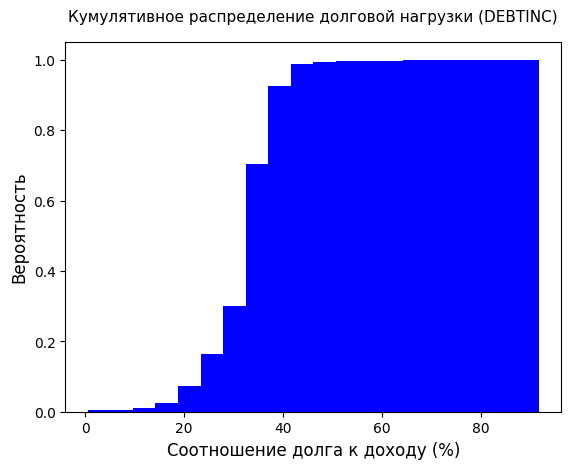

In [26]:
plt.hist(df['DEBTINC'], bins=20, density=True, cumulative=True, color='#0000FF')

plt.title('Кумулятивное распределение долговой нагрузки (DEBTINC)', pad=15, fontsize=11)
plt.xlabel('Соотношение долга к доходу (%)', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)

plt.show()

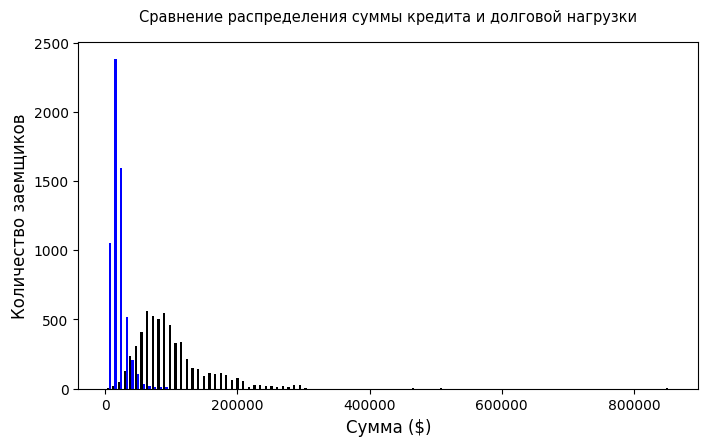

In [27]:
plt.figure(figsize=(8, 4.5))

plt.hist([df['VALUE'], df['LOAN']], bins=100, color=['#000000', '#0000FF'])

plt.title('Сравнение распределения суммы кредита и долговой нагрузки', pad=15, fontsize=10.5)
plt.xlabel('Сумма ($)', fontsize=12)
plt.ylabel('Количество заемщиков', fontsize=12)

plt.show()

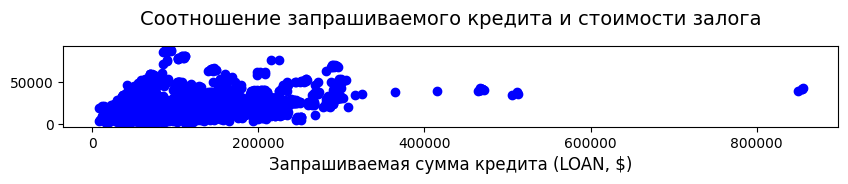

In [28]:
plt.figure(figsize=(10, 8))

plt.scatter(df['VALUE'], df['LOAN'], c='#0000FF')
plt.axis('scaled')

plt.title('Соотношение запрашиваемого кредита и стоимости залога', pad=15, fontsize=14)
plt.xlabel('Запрашиваемая сумма кредита (LOAN, $)', fontsize=12)

plt.show()

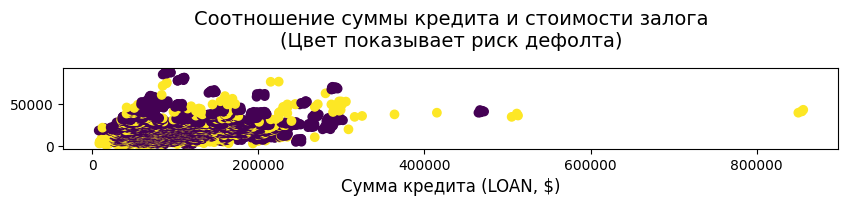

In [29]:
plt.figure(figsize=(10, 8))

plt.scatter(df['VALUE'], df['LOAN'], c=df['BAD'])
plt.axis('scaled')

plt.title('Соотношение суммы кредита и стоимости залога\n(Цвет показывает риск дефолта)', pad=15, fontsize=14)
plt.xlabel('Сумма кредита (LOAN, $)', fontsize=12)


plt.show()

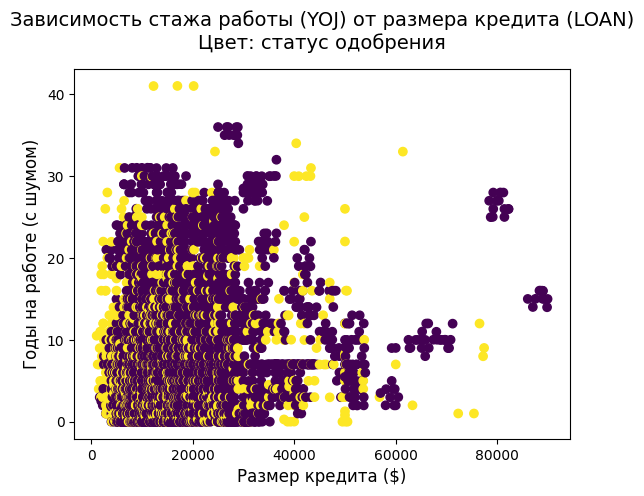

In [30]:
x = df['YOJ'] + np.random.normal(0, 0.01, len(df['YOJ'] ))


plt.scatter(df['LOAN'], x, c=df['BAD'])

plt.title('Зависимость стажа работы (YOJ) от размера кредита (LOAN)\nЦвет: статус одобрения',pad=15, fontsize=14 )
plt.xlabel('Размер кредита ($)', fontsize=12)
plt.ylabel('Годы на работе (с шумом)', fontsize=12)

plt.show()

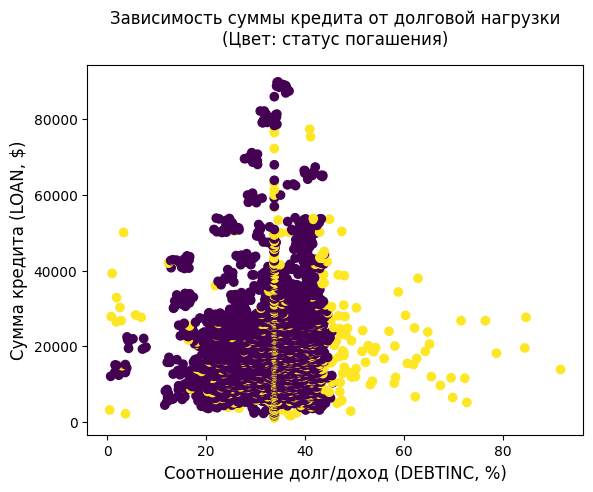

In [31]:
plt.scatter(df['DEBTINC'], df['LOAN'], c=df['BAD'])

plt.title('Зависимость суммы кредита от долговой нагрузки\n(Цвет: статус погашения)', pad=15, fontsize=12)
plt.xlabel('Соотношение долг/доход (DEBTINC, %)', fontsize=12)
plt.ylabel('Сумма кредита (LOAN, $)', fontsize=12)

plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


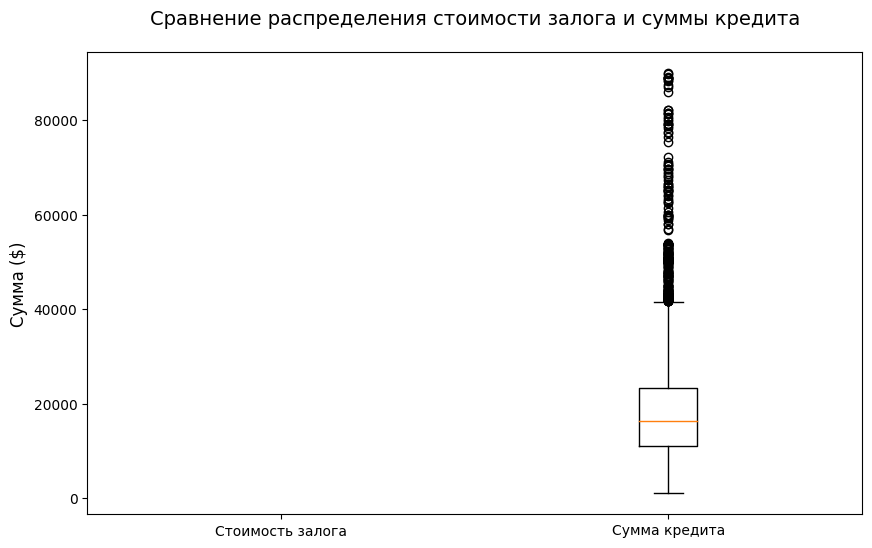

In [32]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['VALUE'], df['LOAN']])
plt.xticks([1, 2], ['Стоимость залога', 'Сумма кредита'])
plt.title('Сравнение распределения стоимости залога и суммы кредита', pad=20, fontsize=14)
plt.ylabel('Сумма ($)', fontsize=12)
plt.show()

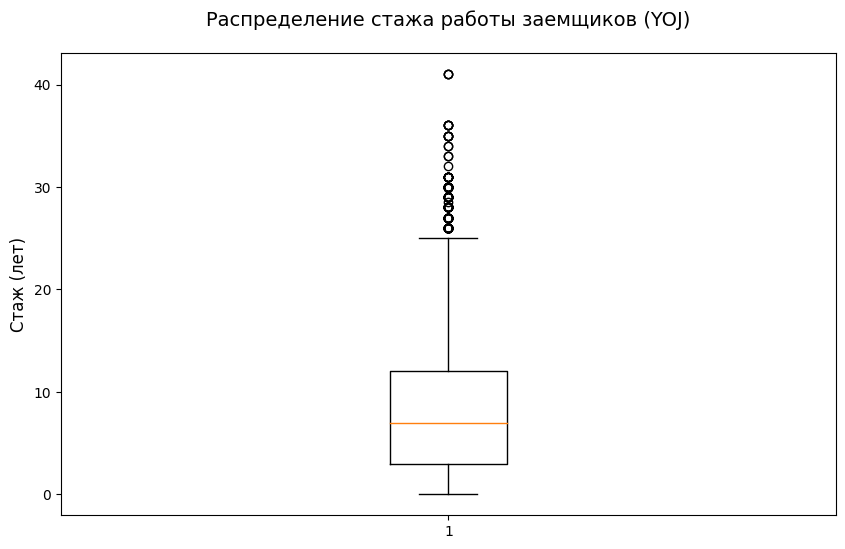

In [33]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['YOJ'])
plt.title('Распределение стажа работы заемщиков (YOJ)', pad=20, fontsize=14)
plt.ylabel('Стаж (лет)', fontsize=12)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook/__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


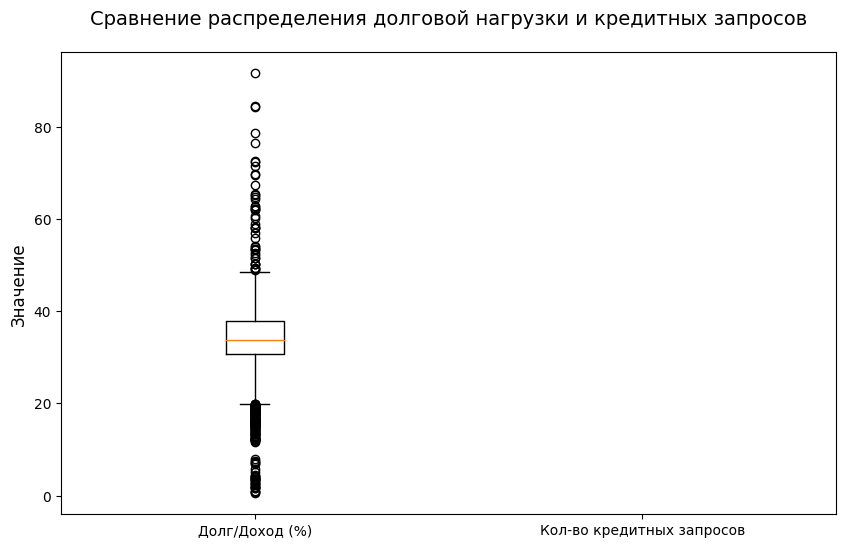

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['DEBTINC'], df['NINQ']])
plt.xticks([1, 2], ['Долг/Доход (%)', 'Кол-во кредитных запросов'])
plt.title('Сравнение распределения долговой нагрузки и кредитных запросов', pad=20, fontsize=14)
plt.ylabel('Значение', fontsize=12)
plt.show()

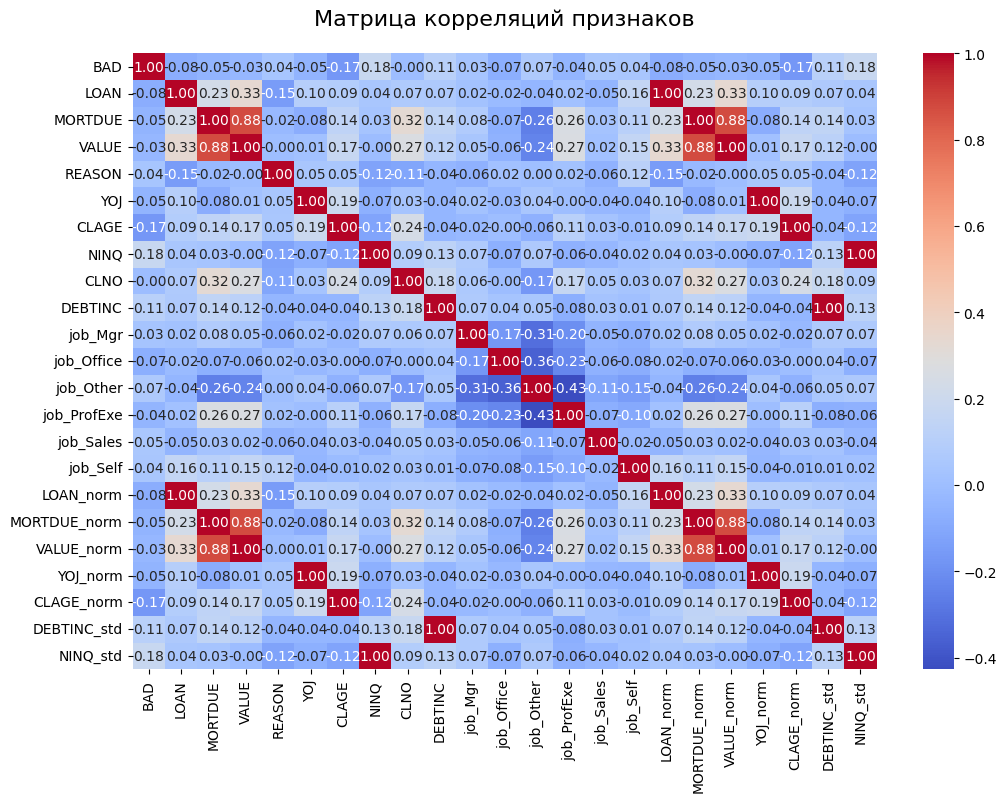

In [35]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Матрица корреляций признаков', pad=20, fontsize=16)
plt.show()

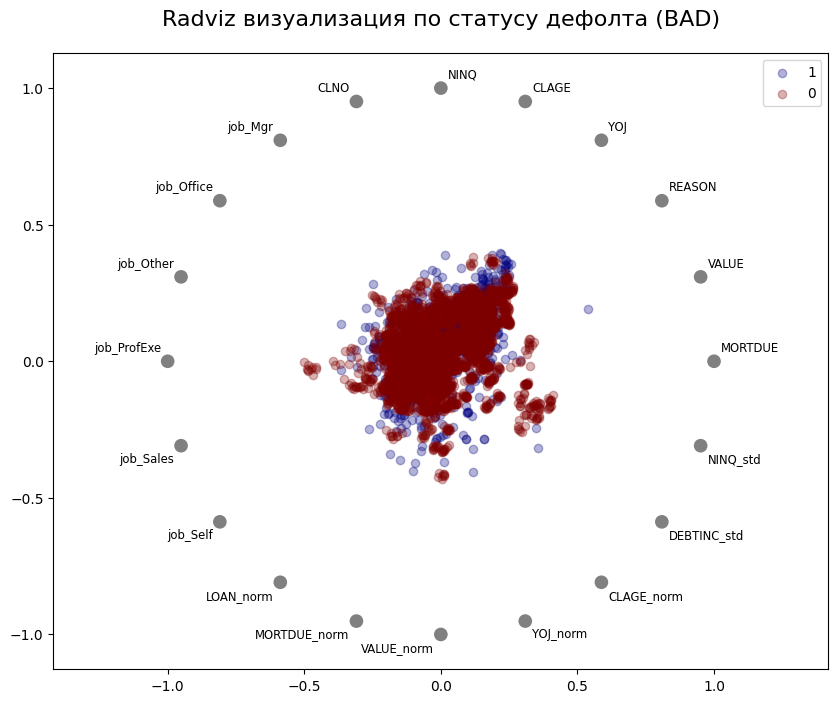

In [36]:
df3 = df.drop(columns=["LOAN", "DEBTINC"])
plt.figure(figsize=(10, 8))
pd.plotting.radviz(df3, 'BAD', colormap='jet', alpha=0.3)
plt.title('Radviz визуализация по статусу дефолта (BAD)', pad=20, fontsize=16)
plt.show()

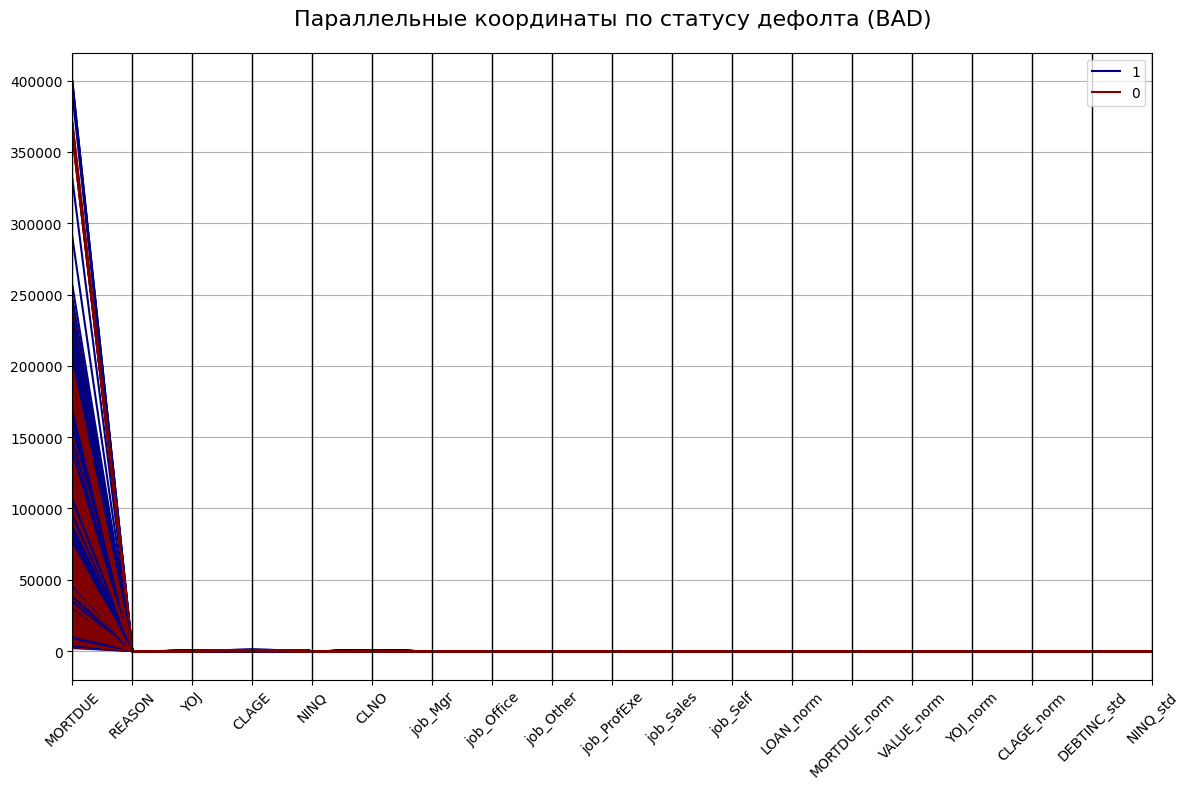

In [37]:
df3 = df.drop(columns=['VALUE', "LOAN", "DEBTINC"])
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(df3, 'BAD', colormap='jet')
plt.title('Параллельные координаты по статусу дефолта (BAD)', pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

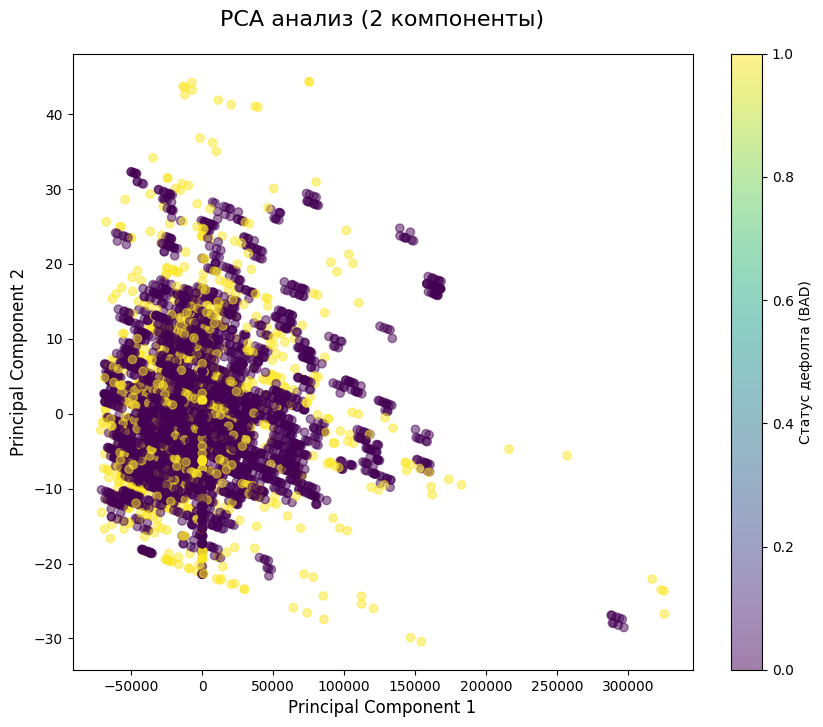

Компоненты PCA:
Компонента 1:
  MORTDUE: 1.0000
  VALUE: 0.0000
  REASON: -0.0000
  YOJ: -0.0000
  CLAGE: 0.0000
  NINQ: 0.0000
  CLNO: 0.0001
  job_Mgr: 0.0000
  job_Office: -0.0000
  job_Other: -0.0000
  job_ProfExe: 0.0000
  job_Sales: 0.0000
  job_Self: 0.0000
  LOAN_norm: 0.0000
  MORTDUE_norm: 0.0000
  VALUE_norm: 0.0000
  YOJ_norm: -0.0000
  CLAGE_norm: 0.0000
  DEBTINC_std: 0.0000
  NINQ_std: 0.0000
Компонента 2:
  MORTDUE: -0.0001
  VALUE: 0.0029
  REASON: -0.0051
  YOJ: 0.0062
  CLAGE: 0.0214
  NINQ: 0.0145
  CLNO: 0.9995
  job_Mgr: 0.0014
  job_Office: 0.0006
  job_Other: -0.0049
  job_ProfExe: 0.0040
  job_Sales: 0.0006
  job_Self: -0.0000
  LOAN_norm: 0.0001
  MORTDUE_norm: -0.0000
  VALUE_norm: 0.0002
  YOJ_norm: 0.0011
  CLAGE_norm: 0.0015
  DEBTINC_std: 0.0149
  NINQ_std: 0.0084


In [38]:
# PCA анализ с предварительной обработкой пропущенных значений
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Выбираем признаки для PCA
X = df.drop(columns=["LOAN", "DEBTINC", "BAD"])

# Заменяем пропущенные значения
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Стандартизация данных
for col in ['VALUE', 'YOJ', 'CLAGE']:
    if col in X.columns:
        X_imputed[:, X.columns.get_loc(col)] = (X_imputed[:, X.columns.get_loc(col)] - np.mean(X_imputed[:, X.columns.get_loc(col)])) / np.std(X_imputed[:, X.columns.get_loc(col)])

# Применяем PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X_imputed)

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(X2[:, 0], X2[:, 1], c=df["BAD"], alpha=0.5)
plt.title('PCA анализ (2 компоненты)', pad=20, fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Статус дефолта (BAD)')
plt.show()

# Вывод компонент PCA
print("Компоненты PCA:")
for i, component in enumerate(pca.components_):
    print(f"Компонента {i+1}:")
    for j, feature in enumerate(X.columns):
        print(f"  {feature}: {component[j]:.4f}")

In [39]:
pca.components_

array([[ 9.99999997e-01,  1.83584709e-05, -2.45650700e-07,
        -1.83092130e-06,  3.09349269e-06,  1.15741059e-06,
         7.16483691e-05,  5.89849442e-07, -5.74040879e-07,
        -2.81525209e-06,  2.47612510e-06,  7.59531734e-08,
         4.33527721e-07,  6.36702897e-07,  2.51580554e-06,
         1.22993183e-06, -3.24183077e-07,  2.21291218e-07,
         3.08179786e-06,  6.69286584e-07],
       [-7.18120995e-05,  2.92792253e-03, -5.11360284e-03,
         6.23735974e-03,  2.14057668e-02,  1.44627110e-02,
         9.99460681e-01,  1.40248250e-03,  6.42897694e-04,
        -4.90911933e-03,  3.95242751e-03,  6.25323755e-04,
        -2.42184187e-05,  9.30290608e-05, -1.80665278e-10,
         1.96157138e-04,  1.10438743e-03,  1.53124920e-03,
         1.48758684e-02,  8.36323639e-03]])

Ранг признаков: [3 5 4 1 2]
Выбранные признаки: [False False False  True False]


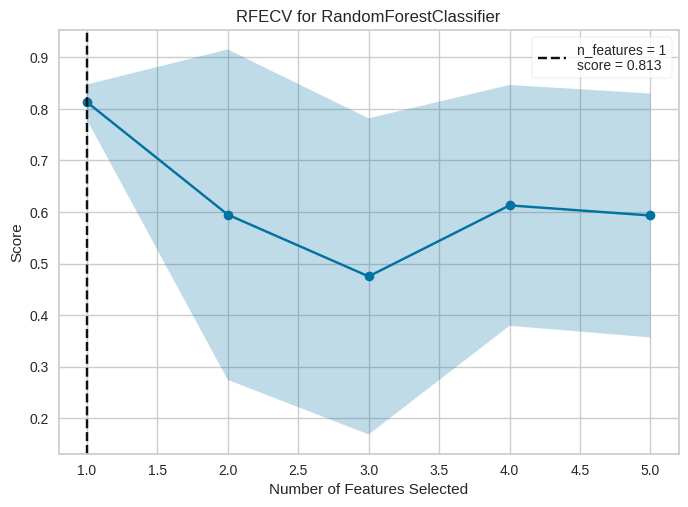

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [40]:
from yellowbrick.features import RFECV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder

X = df[[
    "VALUE", "YOJ",
    "LOAN", "DEBTINC",
    "CLAGE"
]].dropna()

y = df.loc[X.index, "BAD"]

estimator = ensemble.RandomForestClassifier(n_estimators=10)
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

print("Ранг признаков:", selector.ranking_)
print("Выбранные признаки:", selector.support_)
selector.show()

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

df['loan_high'] = (df['LOAN'] > df['LOAN'].median()).astype(int)

df_clean = df.dropna(subset=['LOAN'])

X = df_clean.drop(columns=[
    'LOAN',              
    'loan_high',              
])

y = df_clean['loan_high']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

selector = RandomForestClassifier(n_estimators=10, random_state=42)
rfe = RFE(selector, n_features_to_select=5)
rfe.fit(X, y)

print("Важные признаки:")
print(X.columns[rfe.support_])
print(rfe.estimator_)

Важные признаки:
Index(['VALUE', 'REASON', 'LOAN_norm', 'MORTDUE_norm', 'VALUE_norm'], dtype='object')
RandomForestClassifier(n_estimators=10, random_state=42)


In [42]:
rfe.estimator_

RandomForestClassifier(n_estimators=10, random_state=42)

**3**

In [43]:
from sklearn.model_selection import train_test_split
# Подготовка X и y - исключение только существующих колонок
cols_to_drop = ["LOAN", "loan_high", "BAD"]
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
X = df.drop(columns=existing_cols_to_drop)
y_reg = df['LOAN']  # Целевая переменная для регрессии
y_clf = df['loan_high']  # Целевая переменная для классификации
# Разделение данных на обучающую и тестовую выборки для регрессии
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
# Разделение данных на обучающую и тестовую выборки для классификации
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)
# Вывод размеров выборок
print(len(y_reg_train), len(y_reg_test), len(y_clf_train), len(y_clf_test))

4168 1787 4168 1787


In [44]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Импутер для заполнения пропущенных значений
imputer = SimpleImputer(strategy='mean')
# Применение импутера к обучающим и тестовым данным
X_reg_train_imputed = imputer.fit_transform(X_reg_train)
X_reg_test_imputed = imputer.transform(X_reg_test)
# Обучение модели линейной регрессии
reg = linear_model.LinearRegression()
reg.fit(X_reg_train_imputed, y_reg_train)
y_reg_pred = reg.predict(X_reg_test_imputed)
# Вывод коэффициента детерминации R^2
print(reg.score(X_reg_test_imputed, y_reg_test))
# Визуализация остатков относительно признака Income
if "Income" in X_reg_test.columns:
    plt.scatter(X_reg_test["Income"], (y_reg_test - y_reg_pred) / y_reg_test, s=10)
    plt.xlabel('Income')
    plt.ylabel('Normalized Residuals')
    plt.title('Linear Regression Residuals vs Income')
    plt.show()
else:
    print("Признак 'Income' отсутствует в X_reg_test, визуализация пропущена.")

1.0
Признак 'Income' отсутствует в X_reg_test, визуализация пропущена.


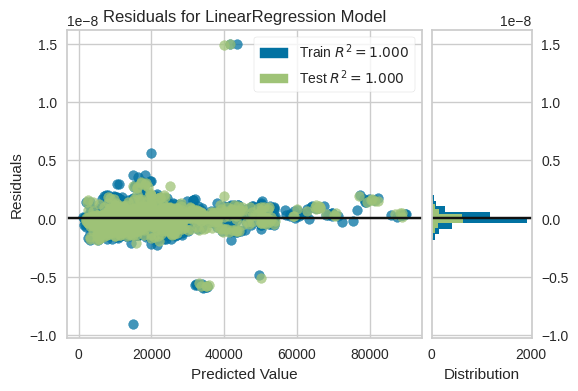

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_reg_train_imputed = imputer.fit_transform(X_reg_train)
X_reg_test_imputed = imputer.transform(X_reg_test)
# Fit the model (assuming reg is already defined, e.g. LinearRegression)
reg.fit(X_reg_train_imputed, y_reg_train)
# Visualize residuals plot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(reg, ax=ax)
rpv.fit(X_reg_train_imputed, y_reg_train)
rpv.score(X_reg_test_imputed, y_reg_test)
rpv.poof()

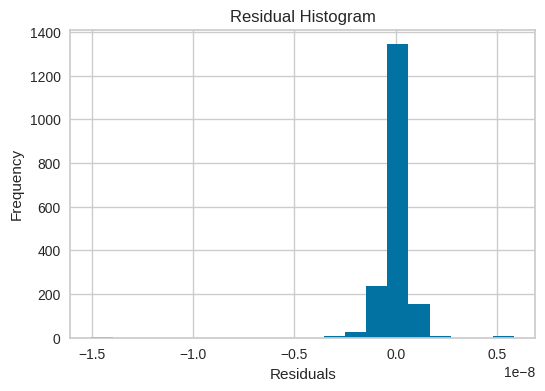

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(6, 4))
# Вычисление остатков (разница между реальными и предсказанными значениями)
resids = y_reg_test - y_reg_pred
# Построение гистограммы остатков
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

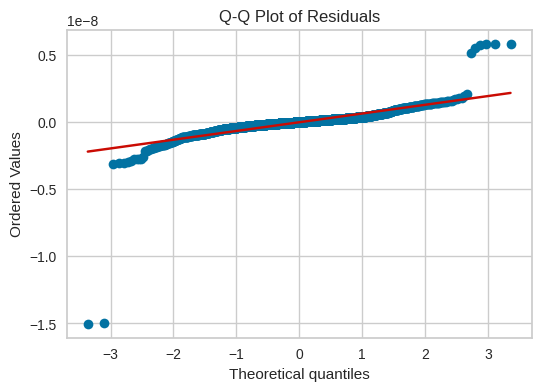

In [47]:
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
# Используйте переменную resids - остатки между фактическими и предсказанными значениями
_ = stats.probplot(resids, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()

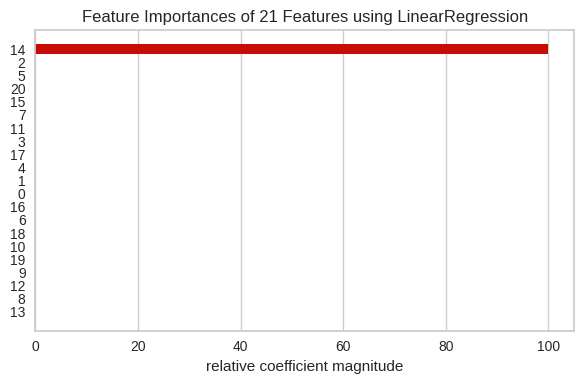

<Axes: title={'center': 'Feature Importances of 21 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [48]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Импутация пропущенных значений для полного набора признаков
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(reg, ax=ax)
fi_viz.fit(X_imputed, y_reg)  # Используем целевую переменную для регрессии y_reg
fi_viz.poof()


In [49]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.impute import SimpleImputer
# Импутируем пропущенные значения
imputer = SimpleImputer(strategy='mean')
X_reg_train_imputed = imputer.fit_transform(X_reg_train)
X_reg_test_imputed = imputer.transform(X_reg_test)
# Обучение KNN-регрессора
reg = neighbors.KNeighborsRegressor(n_neighbors=399)
reg.fit(X_reg_train_imputed, y_reg_train)
# Предсказание на тестовой выборке
y_reg_pred = reg.predict(X_reg_test_imputed)
# Вывод R^2 для тестовой выборки
print(reg.score(X_reg_test_imputed, y_reg_test))
# Визуализация остатков относительно признака Income (если есть в исходном X_reg_test)
if "Income" in X_reg_test.columns:
    plt.scatter(X_reg_test["Income"], (y_reg_test - y_reg_pred) / y_reg_test, s=10)
    plt.xlabel('Income')
    plt.ylabel('Normalized Residuals')
    plt.title('KNN Regression Residuals vs Income')
    plt.show()
else:
    print("Признак 'Income' отсутствует в X_reg_test, визуализация пропущена.")

0.18761756241548078
Признак 'Income' отсутствует в X_reg_test, визуализация пропущена.
